## XOR neural network with no hidden layers

In this notebook, I will attempt to train a netural network with no hidden layers, to learn the xor logic.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
y = np.array([[0, 1, 1, 0]]).T

n_inputs = X.shape[0]
n_outputs = 2

Activation and cost functions

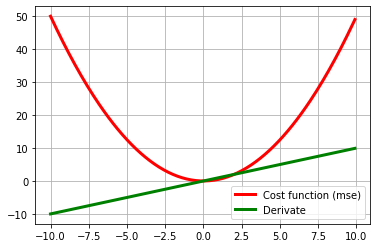

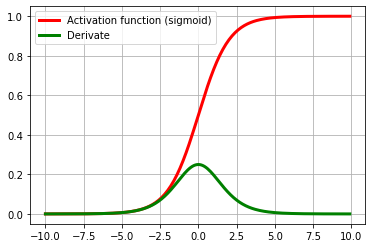

In [2]:
def actf(z):
    return 1 / (1 + np.exp(-z))

def deriv_actf(z):
    return actf(z) * (1 - actf(z))

def cost(y, y_hat):
    return 1/2 * np.sum((y - y_hat)**2)

def deriv_cost(y, y_hat):
    return y - y_hat


plotx = np.arange(-10, 10, 0.1)
plt.plot(plotx, 1/2 * plotx**2, c="r", linewidth=3)
plt.plot(plotx, plotx, c="g", linewidth=3)
plt.legend(["Cost function (mse)", "Derivate"])
plt.grid()
plt.show()

plt.plot(plotx, actf(plotx), c="r", linewidth=3)
plt.plot(plotx, deriv_actf(plotx), c="g", linewidth=3)
plt.legend(["Activation function (sigmoid)", "Derivate"])
plt.grid()
plt.show()

Define feedforward function, weights and biases

In [3]:
def feedforward(X, W, B):
    return actf(np.dot(X, W) + B)


def test(o, y):
    print("Output layer:\n", o)
    print("Outputs:\n", np.argmax(o, axis=1))
    print("Desired Outputs:\n", y.T[0])
    print("Cost:\n", cost(y, o))


def init_network(n_outputs):
    W = 2*np.random.random((n_outputs, 2,))-1
    B = 2*np.random.random((1, n_outputs,))-1
    return W, B
    

W, B = init_network(n_outputs)
o = feedforward(X, W, B)
test(o, y)

Output layer:
 [[0.47373177 0.52433952]
 [0.6185179  0.59247511]
 [0.61799958 0.63472542]
 [0.74450144 0.69621005]]
Outputs:
 [1 0 1 0]
Desired Outputs:
 [0 1 1 0]
Cost:
 1.0646497601538703


Define backpropaganation of error

In [4]:
def backprop(X, y, W, B, eta):
    z = np.dot(X, W) + B
    a = actf(z)
    o = feedforward(X, W, B)
    delta = deriv_cost(y, o)*deriv_actf(a)
    W += np.dot(X.T, delta)
    return W, B
    
    
print(W)
W, B = backprop(X, y, W, B, 0.1)
print(W)

[[0.58623582 0.45510803]
 [0.58843194 0.27677175]]
[[0.51062597 0.38325809]
 [0.51269065 0.21565527]]


Start training

In [22]:
epochs = 100
eta = 0.0001
np.random.seed(5)
W, B = init_network(n_outputs)

err = cost(y, feedforward(X, W, B))
print("Error at the start:\t", err)

for _ in range(epochs):
    W, B = backprop(X, y, W, B, eta)
    
err = cost(y, feedforward(X, W, B))
print("Error at the end:\t", err)
print()

test(o, y)

Error at the start:	 1.1595229131673959
Error at the end:	 1.001994904708436

Output layer:
 [[0.47373177 0.52433952]
 [0.6185179  0.59247511]
 [0.61799958 0.63472542]
 [0.74450144 0.69621005]]
Outputs:
 [1 0 1 0]
Desired Outputs:
 [0 1 1 0]
Cost:
 1.0646497601538703


Generate more data and try the network that way too.

In [36]:
n_inputs = 1_000
X = np.array([
    *[[0, 0] for _ in range(n_inputs//4)],
    *[[0, 1] for _ in range(n_inputs//4)],
    *[[1, 0] for _ in range(n_inputs//4)],
    *[[1, 1] for _ in range(n_inputs//4)]
])
y = np.array([
    *[[0] for _ in range(n_inputs//4)],
    *[[1] for _ in range(n_inputs//4)],
    *[[1] for _ in range(n_inputs//4)],
    *[[0] for _ in range(n_inputs//4)],
])
print(X.shape, y.shape)

epochs = 100
eta = 0.01
np.random.seed(0)
W, B = init_network(n_outputs)

err = cost(y, feedforward(X, W, B))
print("Error at the start:\t", err)

for _ in range(epochs):
    W, B = backprop(X, y, W, B, eta)
    
err = cost(y, feedforward(X, W, B))
print("Error at the end:\t", err)


(1000, 2) (1000, 1)
Error at the start:	 260.2503482602714
Error at the end:	 442.62927299403987
